In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

from pathlib import Path

import magnum
from magnum.solvers.cegis import solve
from magnum.mpc import mpc

import pandas as pd

In [3]:
import funcy as fn

# Feasible Example

In [4]:
from magnum.examples.feasible_example import feasible_example as g

In [5]:
res, _ = solve(g)

In [6]:
res

Result(feasible=True, cost=5.0, solution={'x': <TimeSeries>
SortedDict(None, 1000, {0.0: 0.0, 0.5: 5.0, 1.0: 10.0})
</TimeSeries>, 'u': <TimeSeries>
SortedDict(None, 1000, {0.0: 1.0})
</TimeSeries>})

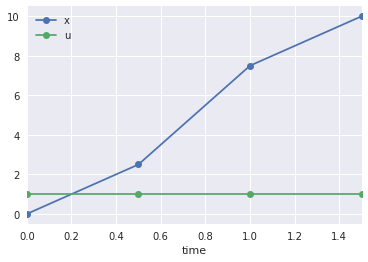

In [7]:
for name, trace in res.solution.items():
    df = trace.moving_average(g.model.dt, pandas=True)
    df.plot(label=name, style=['o-'])

plt.xlabel('time')
plt.legend()

# Feasible Example MPC

In [8]:
from magnum.examples.feasible_example import feasible_example as g

solutions = mpc(g)

In [9]:
def trace_to_df(trace, name, dt):
    index, values = zip(*trace.sample(dt))
    return pd.DataFrame(list(values), columns=[name], index=index)

def solution_to_df(solution, dt):
    return pd.concat([trace_to_df(trace, name, dt) for name, trace in solution.items()], axis=1, join='inner')

In [10]:
dfs = (solution_to_df(sol, g.model.dt) for sol in solutions )

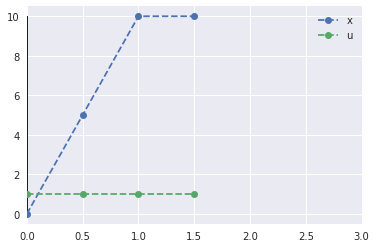

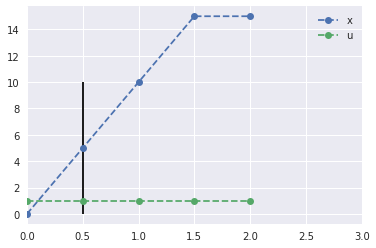

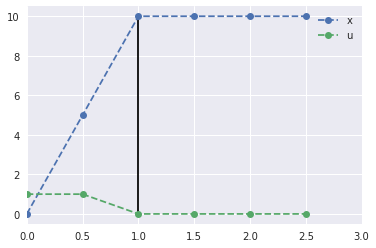

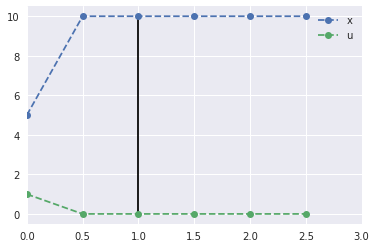

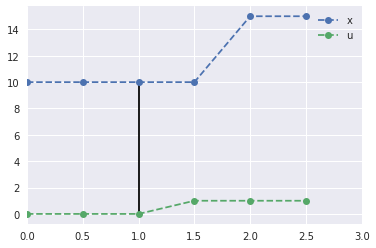

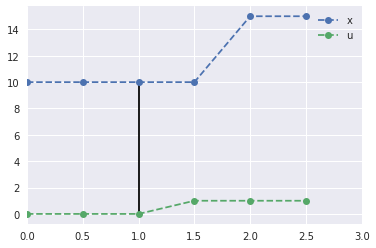

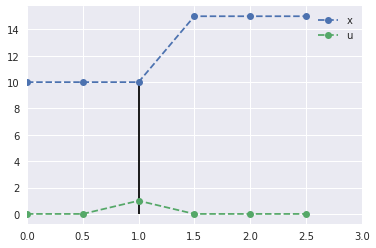

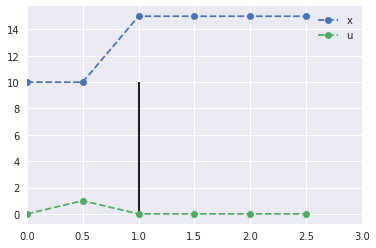

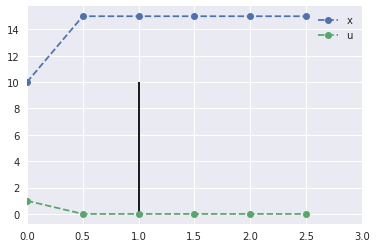

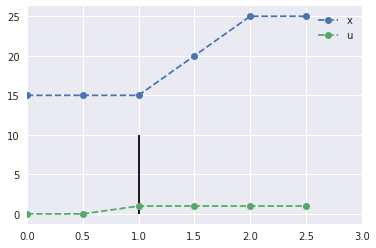

In [11]:
for i, df in enumerate(fn.take(10, dfs)):
    df.plot(style='--o')
    plt.xlim(0, 3)
    i = min(i, 2)
    plt.vlines(i*g.model.dt, 0, 10)

In [ ]:
?plt.vlines

# Rock, Paper, Scissors

In [ ]:
from magnum.examples.rock_paper_scissors import rps as g

In [ ]:
res, counter_examples = solve(g)

In [ ]:
res

In [ ]:
counter_examples

# Intersection

In [ ]:
%run /home/mvc/active/magnumstl/examples/intersection.py

In [ ]:
intersection

In [ ]:
x = cegis2.cegis_loop(intersection)

In [ ]:
next(x)

In [ ]:
x = cegis2.cegis(intersection)

In [ ]:
x[0]

In [ ]:
X = magnum.utils.result_to_traces(x[1])
X

In [ ]:
X[["x", "vx", "u"]].plot()

In [ ]:
X[["x", "y"]].plot()